# Imported Libraries

In [1362]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC 
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import warnings
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier, PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier,
    ExtraTreesClassifier, HistGradientBoostingClassifier, StackingClassifier, VotingClassifier
)
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import Perceptron
import warnings
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
warnings.filterwarnings("ignore")



# Data Analysis

## Reading Data

In [1363]:
DataFrame = pd.read_csv("diabetes.csv")
data = DataFrame.copy()

In [1364]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Analyzing the data

In [1365]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [1366]:
data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [1367]:
data.shape

(768, 9)

In [1368]:
zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in zero_columns:
    zero_count = (data[col] == 0).sum()
    print(f"{col} has {zero_count} zero values")

Glucose has 5 zero values
BloodPressure has 35 zero values
SkinThickness has 227 zero values
Insulin has 374 zero values
BMI has 11 zero values


In [1369]:
for col in zero_columns:
    data[col] = data[col].replace(0,np.nan)

In [1370]:
for col in zero_columns:
    zero_count = (data[col] == 0).sum()
    print(f"{col} has {zero_count} zero values")

Glucose has 0 zero values
BloodPressure has 0 zero values
SkinThickness has 0 zero values
Insulin has 0 zero values
BMI has 0 zero values


In [1371]:
data.isna().sum()


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [1372]:
for col in zero_columns:
    data[col] = data[col].fillna(data[col].mean())

In [1373]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Visualization

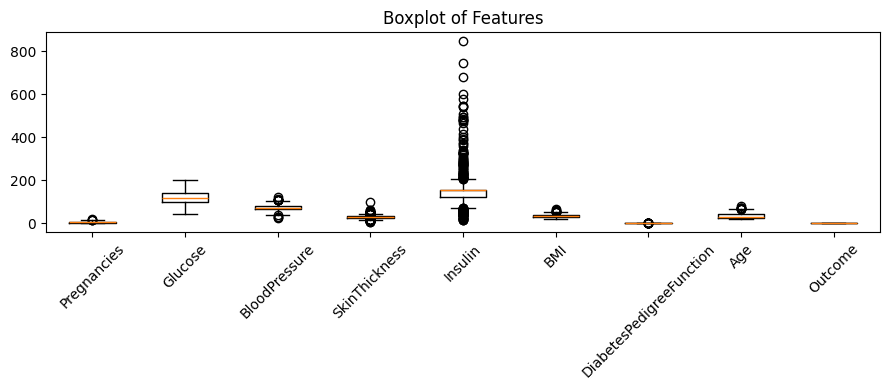

In [1374]:
fig, ax = plt.subplots(1, 1, figsize=(9, 4))
ax.boxplot(data.values, labels=data.columns)  
plt.xticks(rotation=45)  
plt.title("Boxplot of Features")
plt.tight_layout()
plt.show()

In [1375]:
deadly_limits = {
    'BloodPressure': {'min': 40, 'max': 200}, 
    'SkinThickness': {'min': 0, 'max': 100},
    'Insulin': {'min': 0, 'max': 1000},
    'BMI': {'min': 10, 'max': 80},
    'Age': {'min': 0, 'max': 120},
    'DiabetesPedigreeFunction': {'min': 0, 'max': 5},
    'Pregnancies': {'min': 0, 'max': 20}
}

In [1376]:
data_imputed = data.copy()

for feature, limits in deadly_limits.items():
    if feature in data_imputed.columns:
        data_imputed.loc[
            ~data_imputed[feature].between(limits['min'], limits['max']),
            feature
        ] = np.nan

data_imputed = data_imputed.fillna(data_imputed.mean(numeric_only=True))

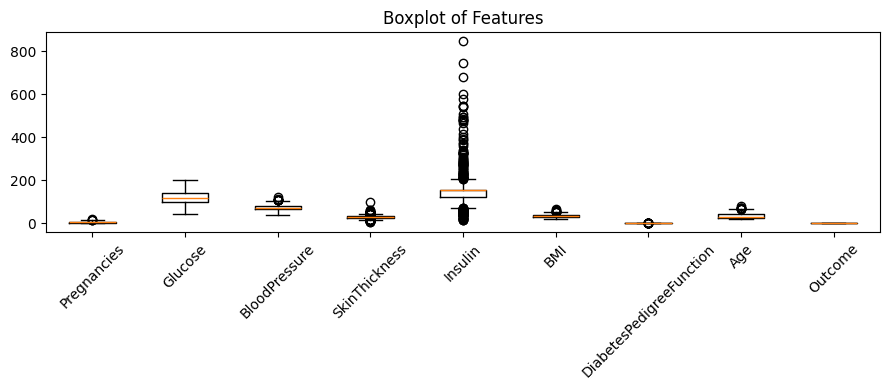

In [1377]:
fig, ax = plt.subplots(1, 1, figsize=(9, 4))
ax.boxplot(data_imputed.values, labels=data.columns)  
plt.xticks(rotation=45)  
plt.title("Boxplot of Features")
plt.tight_layout()
plt.show()

In [1378]:
df_capped = data_imputed.copy()

for feature in deadly_limits.keys():
    if feature in df_capped.columns:
        lower = df_capped[feature].quantile(0.05)
        upper = df_capped[feature].quantile(0.95)
        df_capped[feature] = df_capped[feature].clip(lower=lower, upper=upper)


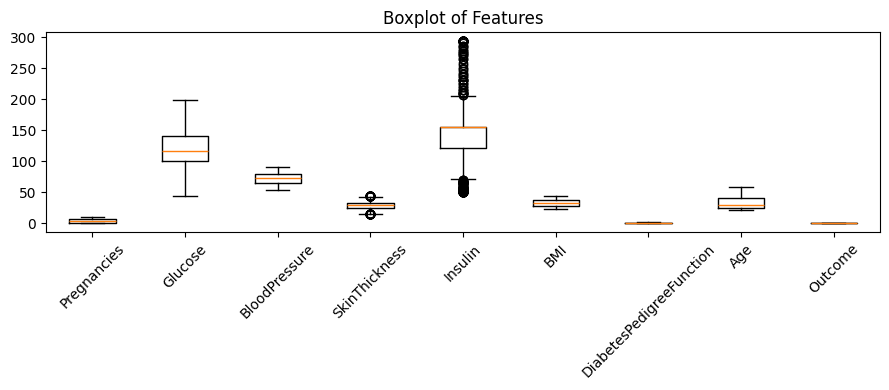

In [1379]:
fig, ax = plt.subplots(1, 1, figsize=(9, 4))
ax.boxplot(df_capped .values, labels=data.columns)  
plt.xticks(rotation=45)  
plt.title("Boxplot of Features")
plt.tight_layout()
plt.show()

In [1380]:
df = df_capped

### Correlation Matrix

- We used correlation matrix to see the relationship between the variables.

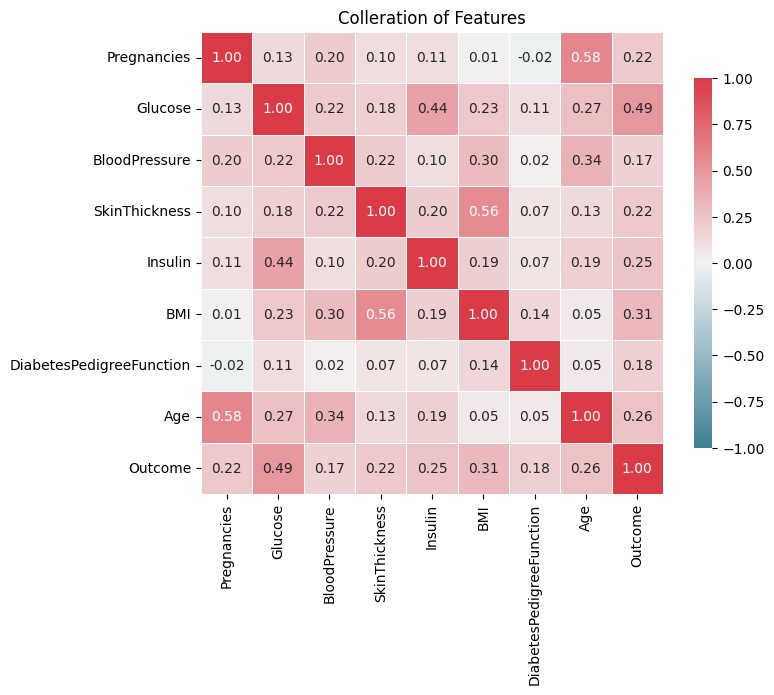

In [1381]:
corr = df.corr()

mask = np.triu(np.ones(corr.shape, dtype=bool))

f, ax = plt.subplots(figsize=(8, 6))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
            annot=True, fmt=".2f")

ax.set_title("Colleration of Features", fontsize=12)

plt.show()

## Feature Engineering
- Feature Engineering is the process of using domain knowledge to extract features from raw data via data mining techniques. These features can be used to improve the performance of machine learning algorithms.



In [1382]:
df_new = df.copy()

df_new['Glucose_per_BMI'] = df_new['Glucose'] / (df_new['BMI'] + 1e-6)
df_new['Glucose_per_Age'] = df_new['Glucose'] / (df_new['Age'] + 1e-6)
df_new['Insulin_per_BMI'] = df_new['Insulin'] / (df_new['BMI'] + 1e-6)
df_new['Insulin_per_Glucose'] = df_new['Insulin'] / (df_new['Glucose'] + 1e-6)
df_new['Pregnancies_per_Age'] = df_new['Pregnancies'] / (df_new['Age'] + 1e-6)
df_new['BMI_per_Age'] = df_new['BMI'] / (df_new['Age'] + 1e-6)
df_new['SkinThickness_per_BMI'] = df_new['SkinThickness'] / (df_new['BMI'] + 1e-6)
df_new['BloodPressure_per_Age'] = df_new['BloodPressure'] / (df_new['Age'] + 1e-6)

df_new['Glucose_Insulin'] = df_new['Glucose'] * df_new['Insulin']
df_new['BMI_Age'] = df_new['BMI'] * df_new['Age']
df_new['Pregnancies_BMI'] = df_new['Pregnancies'] * df_new['BMI']
df_new['Glucose_BMI'] = df_new['Glucose'] * df_new['BMI']
df_new['SkinThickness_Insulin'] = df_new['SkinThickness'] * df_new['Insulin']
df_new['Glucose_Pregnancies'] = df_new['Glucose'] * df_new['Pregnancies']

df_new['Glucose_minus_Insulin'] = df_new['Glucose'] - df_new['Insulin']
df_new['BMI_plus_Insulin'] = df_new['BMI'] + df_new['Insulin']
df_new['Age_minus_Pregnancies'] = df_new['Age'] - df_new['Pregnancies']

df_new['log_Insulin'] = np.log(df_new['Insulin'] + 1)
df_new['log_Glucose'] = np.log(df_new['Glucose'] + 1)

df_new['sqrt_Insulin'] = np.sqrt(df_new['Insulin'])
df_new['sqrt_Age'] = np.sqrt(df_new['Age'])

df_new['Metabolic_Index'] = df_new['Glucose'] * df_new['BMI'] / (df_new['Age'] + 1e-6)
df_new['Health_Risk_Score'] = (df_new['BMI'] + df_new['Age'] + df_new['Glucose']) / 3
df_new['Pregnancy_Impact'] = df_new['Pregnancies'] * df_new['DiabetesPedigreeFunction']


In [1383]:
df = df_new

In [1384]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_per_BMI,...,Glucose_minus_Insulin,BMI_plus_Insulin,Age_minus_Pregnancies,log_Insulin,log_Glucose,sqrt_Insulin,sqrt_Age,Metabolic_Index,Health_Risk_Score,Pregnancy_Impact
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.62700,50.0,1,4.404762,...,-7.548223,189.148223,44.0,5.053364,5.003946,12.471897,7.071068,99.455998,77.200000,3.762
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.35100,31.0,0,3.195489,...,-70.548223,182.148223,30.0,5.053364,4.454347,12.471897,5.567764,72.935482,47.533333,0.351
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.67200,32.0,1,7.854077,...,27.451777,178.848223,24.0,5.053364,5.214936,12.471897,5.656854,133.246871,79.433333,5.376
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.16700,21.0,0,3.167260,...,-5.000000,122.100000,20.0,4.553877,4.499810,9.695360,4.582576,119.090471,46.033333,0.167
4,0.0,137.0,54.0,35.00000,168.000000,43.1,1.13285,33.0,1,3.178654,...,-31.000000,211.100000,33.0,5.129899,4.927254,12.961481,5.744563,178.930298,71.033333,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,44.00000,180.000000,32.9,0.17100,58.0,0,3.069909,...,-79.000000,212.900000,48.0,5.198497,4.624973,13.416408,7.615773,57.291378,63.966667,1.710
764,2.0,122.0,70.0,27.00000,155.548223,36.8,0.34000,27.0,0,3.315217,...,-33.548223,192.348223,25.0,5.053364,4.812184,12.471897,5.196152,166.281475,61.933333,0.680
765,5.0,121.0,72.0,23.00000,112.000000,26.2,0.24500,30.0,0,4.618320,...,9.000000,138.200000,25.0,4.727388,4.804021,10.583005,5.477226,105.673330,59.066667,1.225
766,1.0,126.0,60.0,29.15342,155.548223,30.1,0.34900,47.0,1,4.186046,...,-29.548223,185.648223,46.0,5.053364,4.844187,12.471897,6.855655,80.693615,67.700000,0.349


## Correlation Matrix 

- Now we used the correlation matrix to see the relationship between the with the created new variables.


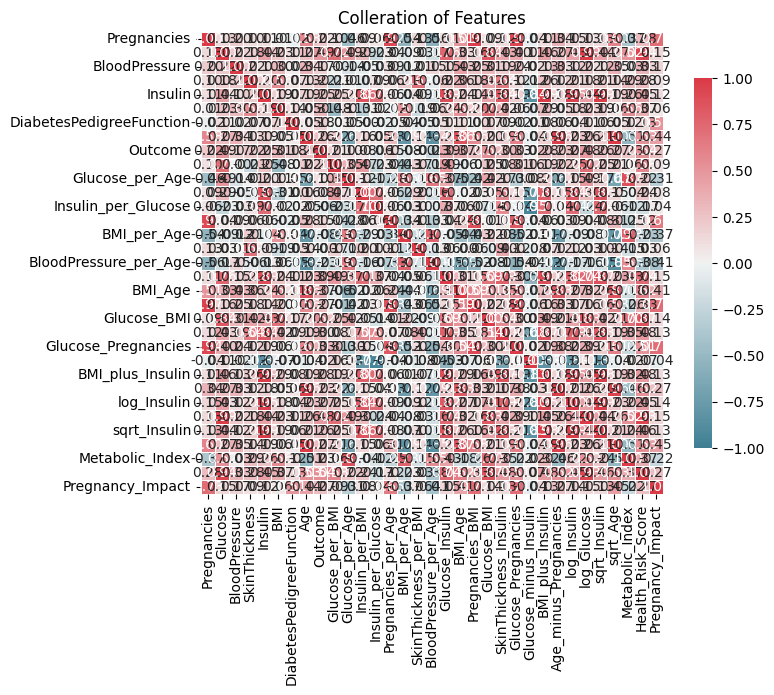

In [1385]:
corr = df.corr()

mask = np.triu(np.ones(corr.shape, dtype=bool))

f, ax = plt.subplots(figsize=(8, 6))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
            annot=True, fmt=".2f")

ax.set_title("Colleration of Features", fontsize=12)

plt.show()


In [1386]:
x =df.drop(['Outcome'], axis = 1 ).values
y = df['Outcome'].values

scalar = StandardScaler()
X_sc = scalar.fit_transform(x)

## PCA 
- We used PCA to reduce the dimension of the data.

In [1387]:
pca = PCA()
X_pca = pca.fit_transform(X_sc)

### Visualization of PCA Optimization

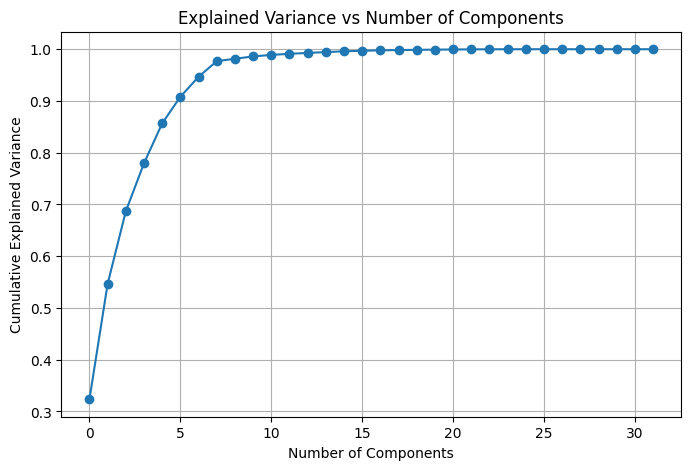

Optimal number of components to retain 95.0% variance: 8


In [1388]:
plt.figure(figsize=(8, 5))
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.grid(True)
plt.show()

threshold = 0.95
optimal_components = np.argmax(cumulative_variance >= threshold) + 1
print(f"Optimal number of components to retain {threshold*100}% variance: {optimal_components}")


In [1389]:
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_sc)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2)

In [1390]:
X_train.shape

(614, 8)

In [1391]:
y_train.shape

(614,)

# Model Training

## Testing Models with Multiple ML Models
In this section, we will test our models with multiple machine learning models. We will use the following models:
- Logistic Regression
- Decision Tree
- Random Forest
- K-Nearest Neighbors
- Support Vector Machin

In [1392]:
models = {
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"{name} accuracy: {accuracy:.4f}") 

SVM accuracy: 0.8182
Logistic Regression accuracy: 0.8247
Decision Tree accuracy: 0.7013
Random Forest accuracy: 0.8247
Gradient Boosting accuracy: 0.7987
K-Nearest Neighbors accuracy: 0.7987
Naive Bayes accuracy: 0.7857


## Trying even on more ML Models

-In this notebook we are trying even more models and see how they perform.

In [1393]:
models = {
    "SVM (RBF)": SVC(),
    "Linear SVM": LinearSVC(max_iter=10000),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Ridge Classifier": RidgeClassifier(),
    "SGD Classifier": SGDClassifier(),
    "Passive Aggressive": PassiveAggressiveClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Extra Tree": ExtraTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Hist Gradient Boosting": HistGradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging": BaggingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes (Gaussian)": GaussianNB(),
    "Naive Bayes (Bernoulli)": BernoulliNB(),
    "MLP Neural Net": MLPClassifier(max_iter=1000),
    "Perceptron": Perceptron(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis()
}

for name, model in models.items():
    try:
      
        if name in ["Linear SVM", "SGD Classifier", "Passive Aggressive", "MLP Neural Net", "Perceptron", "Linear Discriminant Analysis", "Quadratic Discriminant Analysis", "K-Nearest Neighbors"]:
            model = make_pipeline(StandardScaler(), model)
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        print(f"{name} accuracy: {accuracy:.4f}")
    except Exception as e:
        print(f"{name} failed: {str(e)}")


SVM (RBF) accuracy: 0.8182
Linear SVM accuracy: 0.8182
Logistic Regression accuracy: 0.8247
Ridge Classifier accuracy: 0.8247
SGD Classifier accuracy: 0.7727
Passive Aggressive accuracy: 0.7338
Decision Tree accuracy: 0.6818
Extra Tree accuracy: 0.6104
Random Forest accuracy: 0.8117
Extra Trees accuracy: 0.8117
Gradient Boosting accuracy: 0.7987
Hist Gradient Boosting accuracy: 0.7922
AdaBoost accuracy: 0.8182
Bagging accuracy: 0.7727
K-Nearest Neighbors accuracy: 0.8117
Naive Bayes (Gaussian) accuracy: 0.7857
Naive Bayes (Bernoulli) accuracy: 0.8247
MLP Neural Net accuracy: 0.8247
Perceptron accuracy: 0.7727
Linear Discriminant Analysis accuracy: 0.8182
Quadratic Discriminant Analysis accuracy: 0.8182


In [1394]:
param_grid = {
    "reg_param": [0.0, 0.01, 0.05, 0.1, 0.2, 0.5, 1.0],
    "store_covariance": [True, False]
}

grid_search = GridSearchCV(
    estimator=QuadraticDiscriminantAnalysis(),
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("En iyi parametreler:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy:.4f}")


Fitting 5 folds for each of 14 candidates, totalling 70 fits
En iyi parametreler: {'reg_param': 0.5, 'store_covariance': True}
Test set accuracy: 0.8117


In [1395]:
cat_model = CatBoostClassifier(verbose=0, random_seed=42)
param_grid = {"iterations": [100, 200], "depth": [4, 6, 8], "learning_rate": [0.01, 0.1], "l2_leaf_reg": [1, 3, 5]}
grid_search = GridSearchCV(estimator=cat_model, param_grid=param_grid, scoring="accuracy", cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("En iyi parametreler:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy:.4f}")

Fitting 3 folds for each of 36 candidates, totalling 108 fits
En iyi parametreler: {'depth': 4, 'iterations': 200, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
Test set accuracy: 0.7987


## Hyperparameters Tunning
- Using GridSearchCV to find the best hyperparameters

In [1396]:
svm_model = SVC(random_state=42)
param_grid = {
    "C": [0.1, 1, 10, 50,  200],
    "kernel": ["linear", "rbf", "poly"],
    "gamma": ["scale", "auto", 0.001,  0.1],
    "degree": [2, 3, 4],
    "coef0": [0.0, 0.5]
}

grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring="accuracy", cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("En iyi parametreler:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy:.4f}")


Fitting 3 folds for each of 360 candidates, totalling 1080 fits
En iyi parametreler: {'C': 1, 'coef0': 0.0, 'degree': 2, 'gamma': 0.001, 'kernel': 'rbf'}
Test set accuracy: 0.8247


# Final Model Testing

- We took our best model and used GridSearchCV to find the best hyperparameters.

In [1397]:
best_params = {'C': 10, 'coef0': 0.0, 'degree': 2, 'gamma': 0.001, 'kernel': 'rbf'}
best_model = SVC(**best_params, random_state=42)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cv_accuracy = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1).mean()
report = classification_report(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")
print("\nClassification Report:\n", report)

Test Accuracy: 0.8506
Test Precision: 0.8488
Test Recall: 0.8506
Test F1 Score: 0.8493

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       105
           1       0.78      0.73      0.76        49

    accuracy                           0.85       154
   macro avg       0.83      0.82      0.82       154
weighted avg       0.85      0.85      0.85       154



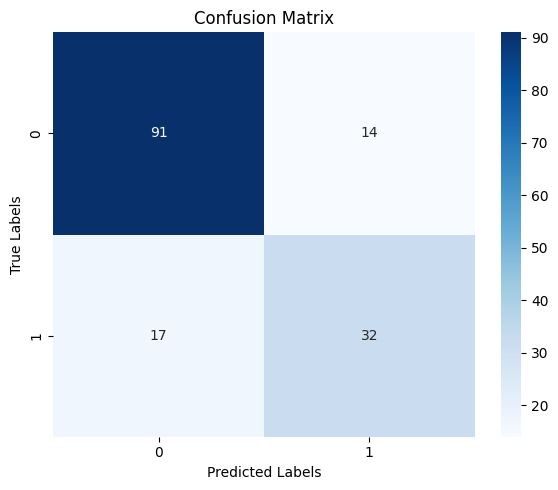

In [1403]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()